In [2]:
!pip install lifelines

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47994 sha256=aaeeaafb08f5fa3e15b2670e22f735f90f0506c5740acb9bad60fc92adab73e2
  Stored in directory: c:\users\ziyth\appdata\local\pip\cache\wheels\85\f5\d2\3ef47d3a836b17620bf41647222825b065245862d12aa62885
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4039 sha256=38a3df271c30c53fec00ad48fcb1b247897f43e909aae1c6dfed309de0b76cca
  Stored in directory: c:\users\ziyth\appdata\local\pip\cache\wheels\16\a2\b6\582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd autograd-gamma


In [30]:
from lifelines.datasets import load_rossi   

from lifelines import CoxPHFitter  
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('mortgage.csv')

In [32]:
df = df[['time','hpi_time', 'gdp_time', 'uer_time','balance_time','interest_rate_time','FICO_orig_time','LTV_orig_time','balance_orig_time']]

In [33]:
df

,time,hpi_time,gdp_time,uer_time,balance_time,interest_rate_time,FICO_orig_time,LTV_orig_time,balance_orig_time
0,25,226.29,2.899137,4.7,41303.42,9.200,715,69.4,45000.0
1,26,225.10,2.151365,4.7,41061.95,9.200,715,69.4,45000.0
2,27,222.39,2.361722,4.4,40804.42,9.200,715,69.4,45000.0
3,28,219.67,1.229172,4.6,40483.89,9.200,715,69.4,45000.0
4,29,217.37,1.692969,4.5,40367.06,9.200,715,69.4,45000.0
...,...,...,...,...,...,...,...,...,...
622484,56,181.43,1.717053,6.6,517107.42,2.664,653,80.0,664000.0
622485,57,187.20,2.556052,6.2,512274.57,2.652,653,80.0,664000.0
622486,58,188.37,2.868594,6.2,507396.72,2.644,653,80.0,664000.0
622487,59,187.65,2.443648,5.7,502478.87,2.638,653,80.0,664000.0


In [34]:
s = df['balance_orig_time'].quantile(0.3)
df['label'] = df['balance_orig_time'].apply(lambda x:0 if x<s else 1)
df = df.drop('balance_orig_time',axis=1)
df

,time,hpi_time,gdp_time,uer_time,balance_time,interest_rate_time,FICO_orig_time,LTV_orig_time,label
0,25,226.29,2.899137,4.7,41303.42,9.200,715,69.4,0
1,26,225.10,2.151365,4.7,41061.95,9.200,715,69.4,0
2,27,222.39,2.361722,4.4,40804.42,9.200,715,69.4,0
3,28,219.67,1.229172,4.6,40483.89,9.200,715,69.4,0
4,29,217.37,1.692969,4.5,40367.06,9.200,715,69.4,0
...,...,...,...,...,...,...,...,...,...
622484,56,181.43,1.717053,6.6,517107.42,2.664,653,80.0,1
622485,57,187.20,2.556052,6.2,512274.57,2.652,653,80.0,1
622486,58,188.37,2.868594,6.2,507396.72,2.644,653,80.0,1
622487,59,187.65,2.443648,5.7,502478.87,2.638,653,80.0,1


In [35]:
short = df[(df.time>=25)&(df.time<50)]
print('25 month',short.shape)
long = df[df.time>=50]
print('50 month',long.shape)

25 month (428678, 9)
50 month (99016, 9)


     Kaplan Meier Estimator_lower_0.95  Kaplan Meier Estimator_upper_0.95
0.5                               38.0                               38.0


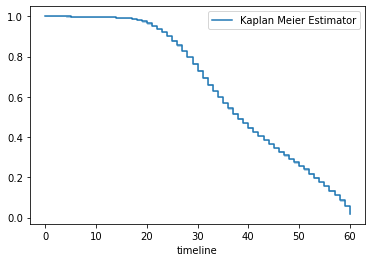

In [56]:
from lifelines import KaplanMeierFitter
import pandas as pd 
import numpy as np 
from lifelines.utils import median_survival_times
import matplotlib.pyplot as plt
kmf = KaplanMeierFitter()
kmf.fit(df['time'], df['label'], label='Kaplan Meier Estimator')

kmf.plot_survival_function()

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_confidence_interval_)

34.0


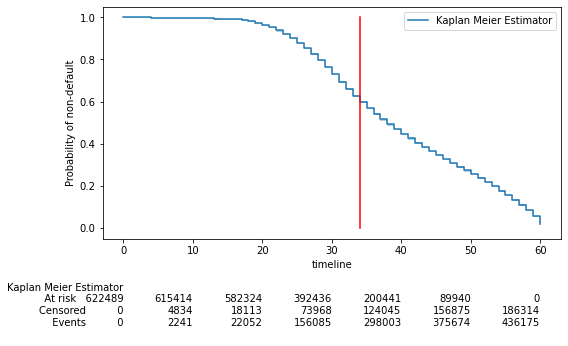

In [47]:
# Median default_time
median_default = df.query("label==1")["time"].median()
print(median_default)

# add to plot
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.plot([median_default, median_default], [0,1], 'k-', c="red")
plt.show()

In [48]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,622489,622489
1.0,283,102,181,0,622489
2.0,529,163,366,0,622206
3.0,881,264,617,0,621677
4.0,841,256,585,0,620796
...,...,...,...,...,...
56.0,8843,5929,2914,0,42283
57.0,8707,5843,2864,0,33440
58.0,8482,5673,2809,0,24733


<AxesSubplot:xlabel='timeline'>

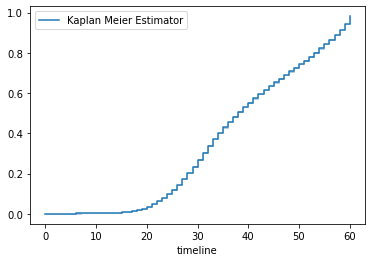

In [49]:
# plot cumulative hazard function
kmf.plot_cumulative_density()

* Short

In [51]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

# fit model on static data
cph.fit(short, 'time', event_col='label')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
hpi_time,4.152660e-01,1.514774,9.062448e-04,4.134898e-01,4.170422e-01,1.512086,1.517467,458.227193,0.000000e+00,inf
gdp_time,-8.926143e-01,0.409584,3.194805e-03,-8.988760e-01,-8.863526e-01,0.407027,0.412156,-279.395587,0.000000e+00,inf
uer_time,-6.898816e-01,0.501635,5.746099e-03,-7.011438e-01,-6.786195e-01,0.496018,0.507317,-120.060878,0.000000e+00,inf
balance_time,6.311227e-07,1.000001,2.919220e-09,6.254011e-07,6.368442e-07,1.000001,1.000001,216.195670,0.000000e+00,inf
interest_rate_time,-9.512066e-02,0.909263,1.147306e-03,-9.736934e-02,-9.287198e-02,0.907221,0.911310,-82.907824,0.000000e+00,inf
FICO_orig_time,1.355099e-03,1.001356,2.922934e-05,1.297811e-03,1.412388e-03,1.001299,1.001413,46.360928,0.000000e+00,inf
LTV_orig_time,-2.004020e-03,0.997998,1.867501e-04,-2.370043e-03,-1.637997e-03,0.997633,0.998363,-10.731027,7.278267e-27,86.828464


<AxesSubplot:xlabel='log(HR) (95% CI)'>

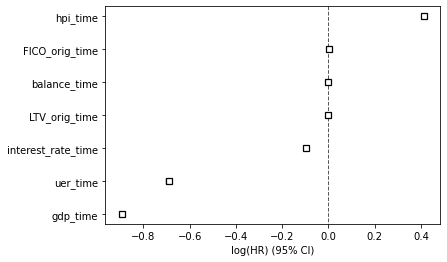

In [52]:
cph.plot()

In [53]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 428678 total observations, 117878 right-censored observations>
             duration col = 'time'
                event col = 'label'
      baseline estimation = breslow
   number of observations = 428678
number of events observed = 310800
   partial log-likelihood = -3173097.45
         time fit was run = 2021-05-15 14:35:43 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
hpi_time             0.42       1.51       0.00             0.41             0.42                 1.51                 1.52
gdp_time            -0.89       0.41       0.00            -0.90            -0.89                 0.41                 0.41
uer_time            -0.69       0.50       0.01            -0.70            -0.68                 0.50                 0.51
balance_time         0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
interest_rate_time  -0.10       0.91       0.00            -0.10            -0.09                 0.91                 0.91
FICO_orig_time       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
LTV_orig_time       -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                         z      p   -log2(p)
covariate                                   
hpi_time            458.23 <0.005        inf
gdp_time           -279.40 <0.005        inf
uer_time           -120.06 <0.005        inf
balance_time        216.20 <0.005        inf
interest_rate_time  -82.91 <0.005        inf
FICO_orig_time       46.36 <0.005        inf
LTV_orig_time       -10.73 <0.005      86.83
---
Concordance = 0.96
Partial AIC = 6346208.90
log-likelihood ratio test = 1119466.45 on 7 df
-log2(p) of ll-ratio test = inf

In [54]:
print(cph.params_)
# Interpretation (under ceteris paribus assumption): 
print('\n 1 EUR in additional credit granted decreases the probability to default by {:.3f}%'.format((np.exp(0.000009) - 1)*100))

covariate
hpi_time              4.152660e-01
gdp_time             -8.926143e-01
uer_time             -6.898816e-01
balance_time          6.311227e-07
interest_rate_time   -9.512066e-02
FICO_orig_time        1.355099e-03
LTV_orig_time        -2.004020e-03
Name: coef, dtype: float64

 1 EUR in additional credit granted decreases the probability to default by 0.001%


<AxesSubplot:>

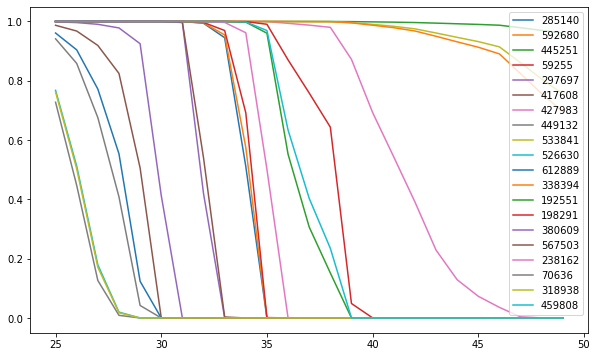

In [43]:
# Individual survival functions
cph.predict_survival_function(short.sample(20)).plot(figsize=(10,6))

In [44]:
# difference to logreg models:'intercept' term
cph.baseline_hazard_

,baseline hazard
25.0,4.335794e-09
26.0,6.637349e-09
27.0,1.722897e-08
28.0,3.622653e-08
29.0,1.633728e-07
30.0,2.355271e-06
31.0,2.439778e-04
32.0,5.787532e-02
33.0,4.814279e-01
34.0,5.887101e+00


In [45]:
# Goodness of fit measure (can be interpreted similar to AUC)
cph.concordance_index_

0.9630718538613849

* 长时间

In [17]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

# fit model on static data
cph.fit(long, 'time', event_col='label')
cph.summary

D:\IESEG\Anaconda\Anaconda\lib\site-packages\lifelines\fitters\coxph_fitter.py:1592: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
hpi_time,-0.854568,0.425467,7.282774e-03,-0.868842,-0.840294,0.419437,0.431583,-117.341034,0.000000e+00,inf
gdp_time,0.031011,1.031497,1.838331e-02,-0.005020,0.067041,0.994993,1.069340,1.686897,9.162311e-02,3.448145
uer_time,5.648997,284.006433,4.622689e-02,5.558394,5.739600,259.405858,310.939987,122.201540,0.000000e+00,inf
balance_time,0.000001,1.000001,1.294498e-08,0.000001,0.000002,1.000001,1.000002,115.763821,0.000000e+00,inf
interest_rate_time,-0.130696,0.877485,1.836142e-03,-0.134294,-0.127097,0.874333,0.880648,-71.179474,0.000000e+00,inf
FICO_orig_time,0.001376,1.001377,5.808787e-05,0.001262,0.001490,1.001263,1.001491,23.689145,4.665356e-124,409.697096
LTV_orig_time,-0.001092,0.998908,4.002537e-04,-0.001877,-0.000308,0.998125,0.999692,-2.728599,6.360393e-03,7.296668


<AxesSubplot:xlabel='log(HR) (95% CI)'>

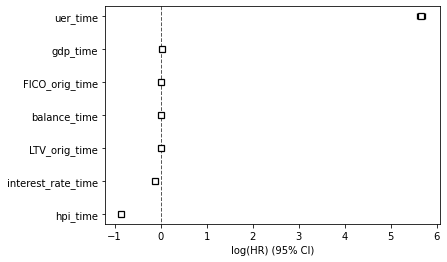

In [18]:
cph.plot()

In [19]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 99016 total observations, 32244 right-censored observations>
             duration col = 'time'
                event col = 'label'
      baseline estimation = breslow
   number of observations = 99016
number of events observed = 66772
   partial log-likelihood = -579938.51
         time fit was run = 2021-05-15 09:19:54 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
hpi_time            -0.85       0.43       0.01            -0.87            -0.84                 0.42                 0.43
gdp_time             0.03       1.03       0.02            -0.01             0.07                 0.99                 1.07
uer_time             5.65     284.01       0.05             5.56             5.74               259.41               310.94
balance_time         0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
interest_rate_time  -0.13       0.88       0.00            -0.13            -0.13                 0.87                 0.88
FICO_orig_time       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
LTV_orig_time       -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                         z      p   -log2(p)
covariate                                   
hpi_time           -117.34 <0.005        inf
gdp_time              1.69   0.09       3.45
uer_time            122.20 <0.005        inf
balance_time        115.76 <0.005        inf
interest_rate_time  -71.18 <0.005        inf
FICO_orig_time       23.69 <0.005     409.70
LTV_orig_time        -2.73   0.01       7.30
---
Concordance = 0.99
Partial AIC = 1159891.03
log-likelihood ratio test = 254467.16 on 7 df
-log2(p) of ll-ratio test = inf

In [20]:
print(cph.params_)
# Interpretation (under ceteris paribus assumption): 
print('\n 1 EUR in additional credit granted decreases the probability to default by {:.3f}%'.format((np.exp(0.000009) - 1)*100))

covariate
hpi_time             -0.854568
gdp_time              0.031011
uer_time              5.648997
balance_time          0.000001
interest_rate_time   -0.130696
FICO_orig_time        0.001376
LTV_orig_time        -0.001092
Name: coef, dtype: float64

 1 EUR in additional credit granted decreases the probability to default by 0.001%


<AxesSubplot:>

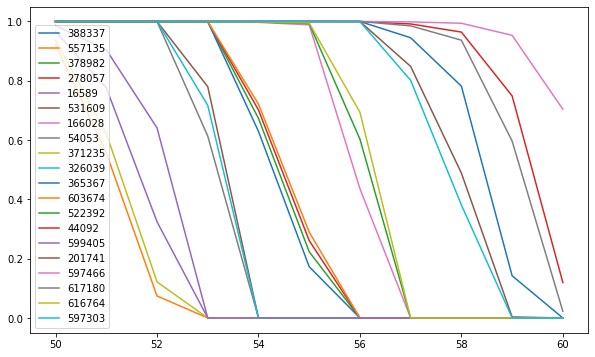

In [21]:
# Individual survival functions
cph.predict_survival_function(long.sample(20)).plot(figsize=(10,6))

In [22]:
# difference to logreg models:'intercept' term
cph.baseline_hazard_

,baseline hazard
50.0,1.802173e-10
51.0,1.134476e-09
52.0,4.518263e-09
53.0,1.263294e-03
54.0,1.469109e+00
55.0,4.104141e+00
56.0,3.999798e+02
57.0,3.655051e+05
58.0,1.227885e+06
59.0,1.102683e+07


In [23]:
# Goodness of fit measure (can be interpreted similar to AUC)
cph.concordance_index_

0.9883828605267607